In [55]:
from pickle import FALSE # This import is not necessary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn import linear_model


# Load the dataset
file_path = '/content/CO2_3.csv'
df = pd.read_csv(file_path)

# Adding a column for t_i
df['t_i'] = (np.arange(len(df)) + 0.5) / 12
# Cleaning the data by dropping rows with missing values (-99.99) in the CO2 column
df_cleaned = df[df.iloc[:, 1] != -99.99].copy()


# Extracting the relevant columns: CO2 concentration and t_i
# df_cleaned.columns = df_cleaned['CO2', 't_i'] # Incorrect way to rename columns
df_cleaned = df_cleaned[['CO2', 't_i']] # Select the desired columns

# Splitting the data into training and test sets (80:20 split)
train_data, test_data = train_test_split(df_cleaned, test_size=0.2, shuffle = False) # Use boolean False

# Fitting the training data to a simple linear model F_1(t) ~ α_0 + α_1*t
X_train = train_data['t_i'].values.reshape(-1, 1)
y_train = train_data['CO2'].values

model = LinearRegression()
model.fit(X_train, y_train)

alpha_0_hat = model.intercept_
alpha_1_hat = model.coef_[0]

# Predictions on the test set
X_test = test_data['t_i'].values.reshape(-1, 1)
y_test = test_data['CO2'].values
y_pred = model.predict(X_test)

# Calculating RMSE and MAPE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred)

# Reporting the values of α_0_hat and α_1_hat
print(f'α_0_hat: {alpha_0_hat:.2f}')
print(f'α_1_hat: {alpha_1_hat:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape:.2%}')

α_0_hat: 308.99
α_1_hat: 1.41
RMSE: 10.64
MAPE: 2.45%


In [57]:
df.head()

,Date,CO2,Mn,t_i
0,1958.0411,-99.99,1,0.041667
1,1958.1260,-99.99,2,0.125000
2,1958.2027,315.70,3,0.208333
3,1958.2877,317.45,4,0.291667
4,1958.3699,317.51,5,0.375000


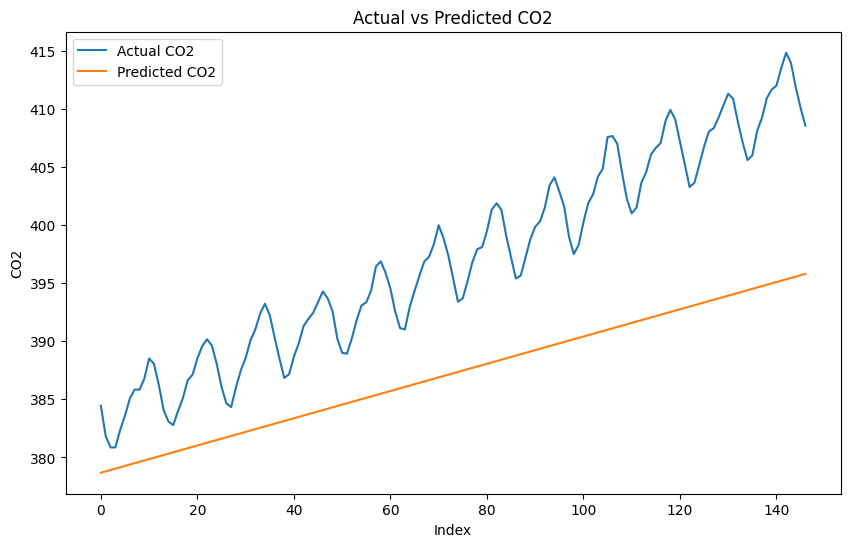

In [30]:
# prompt: plot model

import matplotlib.pyplot as plt

# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual CO2')
plt.plot(y_pred, label='Predicted CO2')
plt.xlabel('Index')
plt.ylabel('CO2')
plt.title('Actual vs Predicted CO2')
plt.legend()
plt.show()

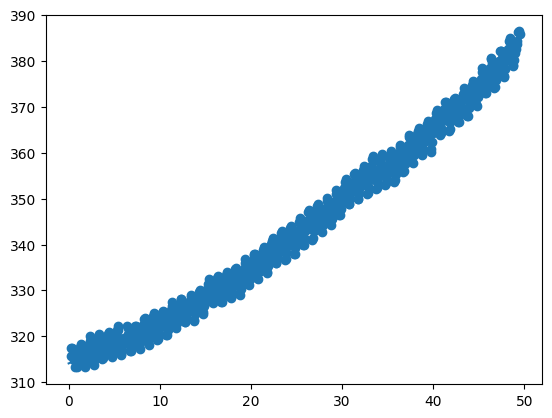

         2
0.01212 x + 0.8021 x + 314.1


In [31]:
# degree 2 polynomial fit or quadratic fit
model = np.poly1d(np.polyfit(X_train.flatten(), # Use the X_train NumPy array and flatten it
                             y_train, 2))

# polynomial line visualization
polyline = np.linspace(0, 10, 100)
plt.scatter(X_train, y_train)
plt.plot(polyline, model(polyline))
plt.show()

print(model)



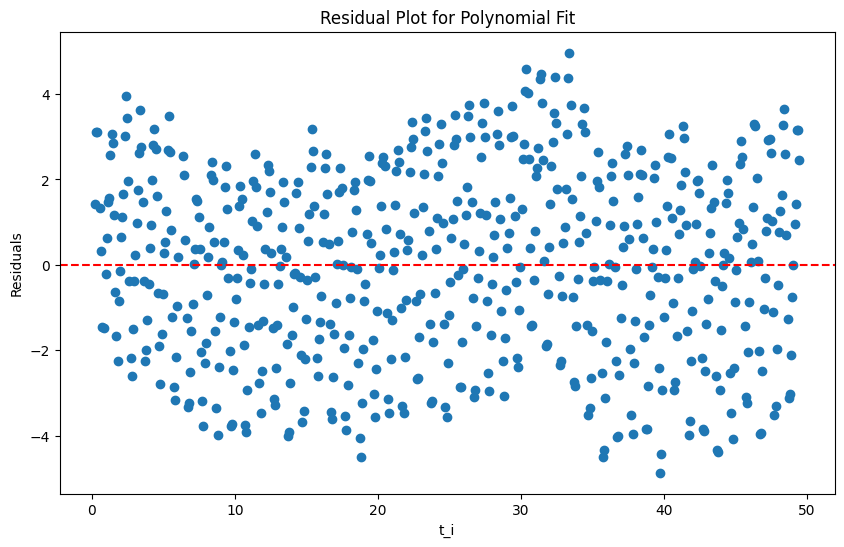

In [32]:
# prompt: plot residual error for the polynomial fit

import matplotlib.pyplot as plt
# Calculate residuals
residuals = y_train - model(X_train.flatten())

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(X_train, residuals)
plt.xlabel('t_i')
plt.ylabel('Residuals')
plt.title('Residual Plot for Polynomial Fit')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()


In [33]:
# prompt: report the RMSE and the MAPE for the quadratic model

import numpy as np
# Predictions on the test set using the quadratic model
y_pred_poly = model(X_test.flatten())  # Flatten X_test for the polynomial model

# Calculating RMSE and MAPE for the quadratic model
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
mape_poly = mean_absolute_percentage_error(y_test, y_pred_poly)

print(f'RMSE (Quadratic Model): {rmse_poly:.2f}')
print(f'MAPE (Quadratic Model): {mape_poly:.2%}')


RMSE (Quadratic Model): 2.50
MAPE (Quadratic Model): 0.53%


In [34]:
# prompt: subtract the quadratic model from df_cleaned

# Calculate the predictions for the entire dataset
y_pred_all = model(df_cleaned['t_i'].values)

# Subtract the quadratic model from the CO2 values
df_cleaned['CO2_detrended'] = df_cleaned['CO2'] - y_pred_all


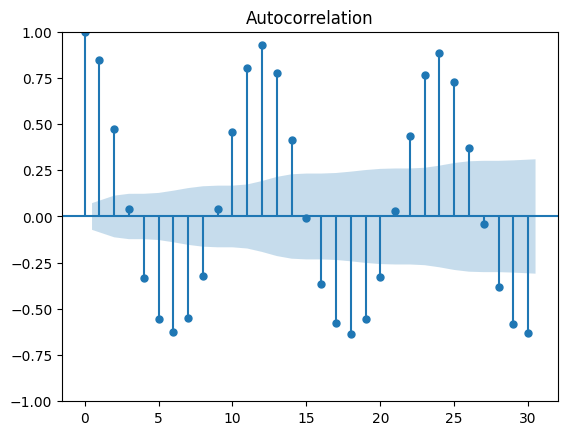

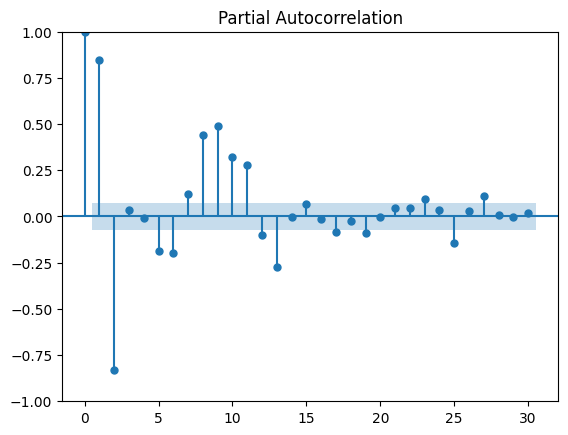

In [140]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(df_cleaned['CO2_detrended'], lags=30)
plt.show()
sm.graphics.tsa.plot_pacf(df_cleaned['CO2_detrended'], lags=30)
plt.show()


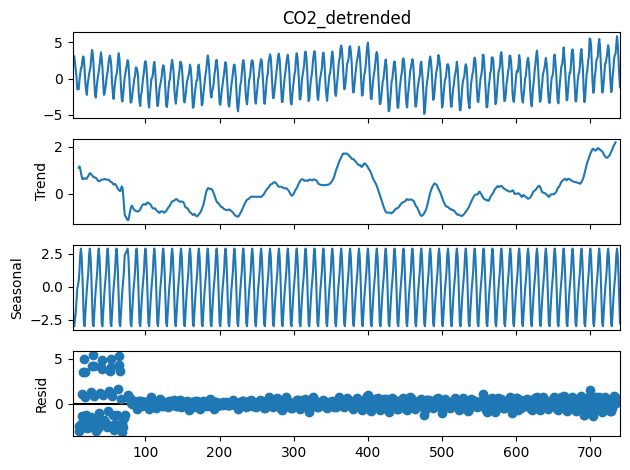

In [145]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df_cleaned['CO2_detrended'],model='additive', period=12)
decompose.plot()
plt.show()

In [63]:
# prompt: join df and df_cleaned

import pandas as pd
# Assuming 't_i' is the common column between the two dataframes
df_merged = pd.merge(df, df_cleaned, on='t_i', how='left')
print(df_merged.head())


         Date   CO2_x  Mn       t_i   CO2_y  CO2_detrended   mn
0   1958.0411  -99.99   1  0.041667     NaN            NaN  NaN
1   1958.1260  -99.99   2  0.125000     NaN            NaN  NaN
2   1958.2027  315.70   3  0.208333  315.70       1.431786  0.0
3   1958.2877  317.45   4  0.291667  317.45       3.114440  1.0
4   1958.3699  317.51   5  0.375000  317.51       3.106925  2.0


In [159]:
# prompt: drop rows with NaN values from df_merged

df_merged = df_merged.dropna()
print(df_merged.head())
print(df_merged.tail())


         Date   CO2_x  Mn       t_i   CO2_y  CO2_detrended  sin_approx
0   1958.2027  315.70   3  0.208333  315.70       1.431786    0.279612
1   1958.2877  317.45   4  0.291667  317.45       3.114440    0.278681
2   1958.3699  317.51   5  0.375000  317.51       3.106925    0.277475
3   1958.5370  315.86   7  0.541667  315.86       1.321391    0.274248
4   1958.6219  314.93   8  0.625000  314.93       0.323372    0.272233
           Date   CO2_x  Mn        t_i   CO2_y  CO2_detrended  sin_approx
729   2019.3699  414.83   5  61.375000  414.83       5.855415    0.242895
730   2019.4548  413.96   6  61.458333  413.96       4.794538    0.238505
731   2019.5370  411.85   7  61.541667  411.85       2.493492    0.233917
732   2019.6219  410.08   8  61.625000  410.08       0.532278    0.229138
733   2019.7068  408.55   9  61.708333  408.55      -1.189105    0.224179


In [113]:
# prompt: find the mean of the set of CO2_detrended where Mn = 1, Mn = 2, Mn = 3, etc.

# Group the DataFrame by 'Mn' and calculate the mean of 'CO2_detrended' for each group
mean_co2_detrended_by_mn = df_merged.groupby('Mn')['CO2_detrended'].mean()

# Print the result
print(mean_co2_detrended_by_mn)


Mn
1     0.179796
2     0.818816
3     1.501363
4     2.737018
5     3.211877
6     2.493964
7     0.872987
8    -1.244371
9    -3.036576
10   -3.211683
11   -1.933442
12   -0.769444
Name: CO2_detrended, dtype: float64


Include your answers to the following questions in your written report.

Problem 2: The final model

1. (3 points) Plot the periodic signal P_i. (Your plot should have 1 data point for each month, so 12 in total.) Clearly state the definition of P_i , and make sure your plot is clearly labeled.

Answer: The P_i function is a sine wave function that has been fit to values of each month's average CO2 levels, detrended from their quadratic trend.

Here is the graph:

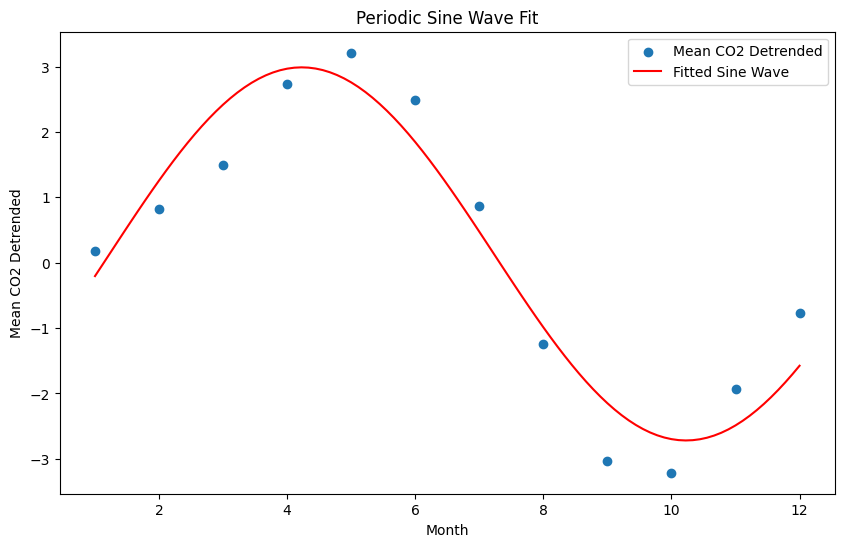

In [191]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# x values are the months (1 to 12)
x_data = np.array(range(1, 13))
# y values are the mean CO2 detrended values
y_data = mean_co2_detrended_by_mn.values

# Define the sine wave function
def sine_func(x, amplitude, phase_shift, vertical_shift):
  return amplitude * np.sin(1 / 12 * 2 * np.pi * (x - phase_shift)) + vertical_shift #Removed mean as it was not defined

# Fit the sine wave to the data
params, _ = curve_fit(sine_func, x_data, y_data)

# Extract the fitted parameters
amplitude, phase_shift, vertical_shift = params

# Generate x values for a smooth sine wave (for plotting)
x_smooth = np.linspace(1, 12, 100)
# Calculate the corresponding y values using the fitted sine wave, using x_smooth
y_smooth = sine_func(x_smooth, amplitude, phase_shift, vertical_shift) # Use x_smooth here

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Mean CO2 Detrended')  # Plot the original mean values
plt.plot(x_smooth, y_smooth, color='red', label='Fitted Sine Wave')  # Plot the fitted sine wave
plt.xlabel('Month')
plt.ylabel('Mean CO2 Detrended')
plt.title('Periodic Sine Wave Fit')
plt.legend()
plt.show()

In [192]:
# prompt: list the ordered pairs on the fitted sine wave

# Create a list of ordered pairs
ordered_pairs = [(x, y) for x, y in zip(x_smooth, y_smooth)]

# Print the ordered pairs
print(ordered_pairs)


[(1.0, -0.2043582913368476), (1.1111111111111112, -0.03906032175777707), (1.2222222222222223, 0.12682669896821827), (1.3333333333333333, 0.29274146167329956), (1.4444444444444444, 0.45812256331955326), (1.5555555555555556, 0.6224104066091616), (1.6666666666666665, 0.7850490934845227), (1.7777777777777777, 0.9454883061113134), (1.8888888888888888, 1.10318516897984), (2.0, 1.25760608582392), (2.111111111111111, 1.4082285451417418), (2.2222222222222223, 1.5545428882093892), (2.333333333333333, 1.696054033604634), (2.4444444444444446, 1.8322831524057575), (2.5555555555555554, 1.962769288397045), (2.6666666666666665, 2.0870709177987163), (2.7777777777777777, 2.204767443243628), (2.888888888888889, 2.315460616945632), (3.0, 2.4187758882440185), (3.111111111111111, 2.514363670964392), (3.2222222222222223, 2.601900526307625), (3.333333333333333, 2.6810902572643744), (3.444444444444444, 2.751664910852002), (3.5555555555555554, 2.813385684782647), (3.6666666666666665, 2.866043735494577), (3.7777

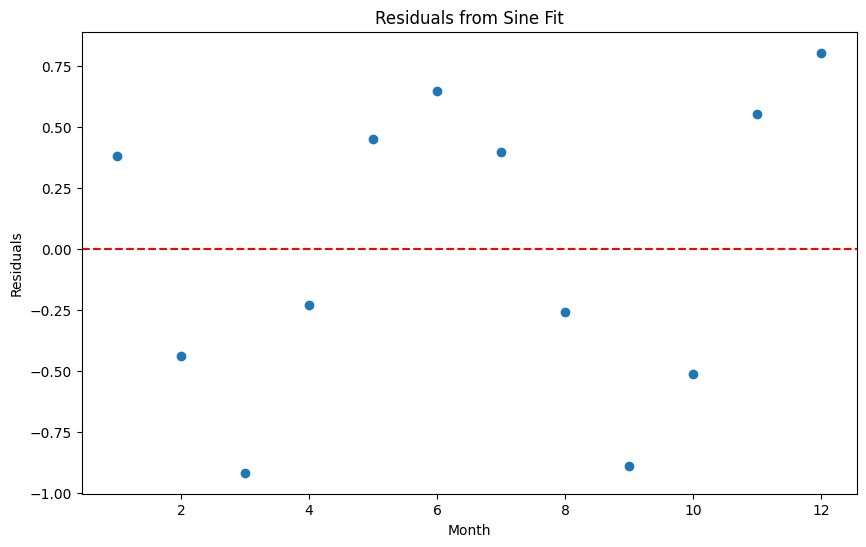

In [193]:
# prompt: plot the residuals

import matplotlib.pyplot as plt
# Calculate the residuals
residuals_sine = y_data - sine_func(x_data, amplitude, phase_shift, vertical_shift)

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(x_data, residuals_sine)
plt.xlabel('Month')
plt.ylabel('Residuals')
plt.title('Residuals from Sine Fit')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()


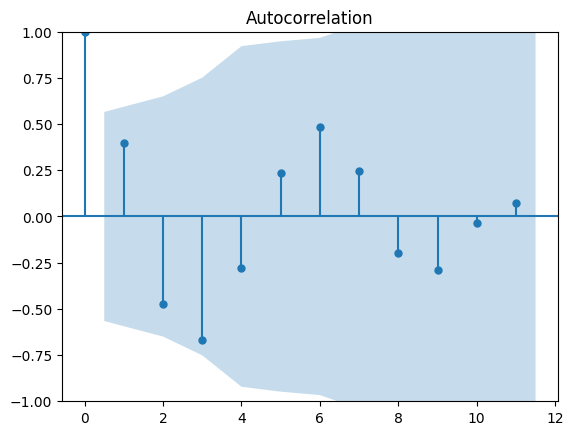

In [194]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(residuals_sine, lags = 11)
plt.show()

In [195]:
print(np.mean((residuals_sine)**2))

0.34131376716411604


[-0.14651627  2.97081564  0.13422771]


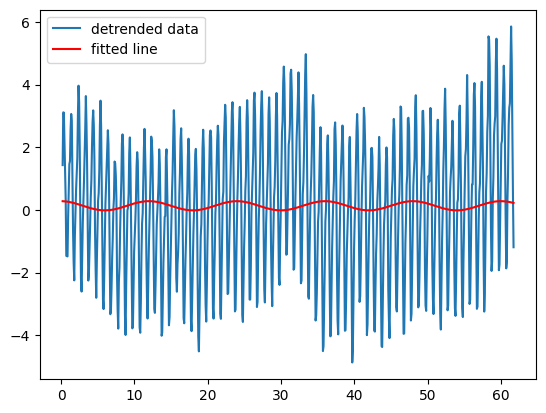

1274.1991681182851


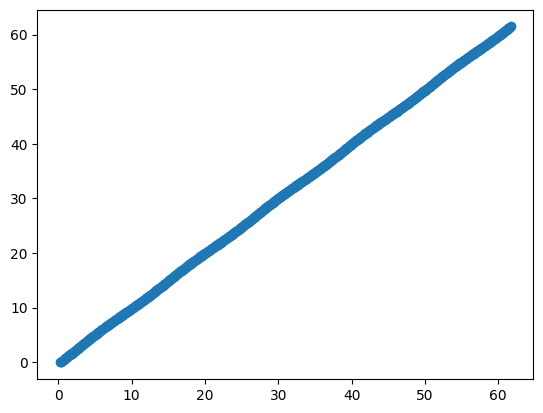

In [131]:
from scipy import optimize
period = 12
x = df_merged['t_i']
def sine_function(X, amp, phase_shift, mean):
  return (amp * np.sin(1/period * 2 * np.pi * (X - phase_shift)) + mean)
params, _ = sine_curve_fit = optimize.curve_fit(
  f = sine_function,
  xdata = x,
  ydata = df_cleaned['CO2_detrended'],
  p0 = np.array([3, 1, 10]))
print(params)
amp, phase_shift, mean = params
sin_approx = sine_function(x, amp, phase_shift, mean)
plt.plot(x, df_cleaned['CO2_detrended'], label='detrended data')
plt.plot(x, sin_approx, 'r', label='fitted line')
plt.legend()
plt.plot()
plt.show()
sin_residuals = x - sin_approx
plt.plot(x, sin_residuals,'o');
print(np.mean((sin_residuals)**2))

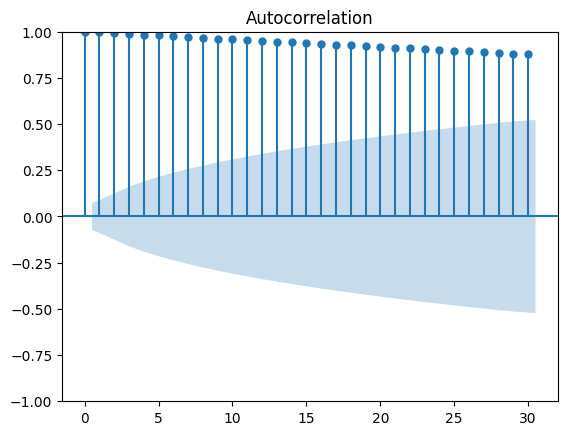

In [132]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(sin_residuals, lags=30)
plt.show()

In [86]:
# prompt: show ordered pairs of fitted line above

# Group by 'Mn' and calculate the mean of 'CO2_detrended'
# ... (rest of the preceding code)

# ... (sine wave fitting)

# Extract x and y values from the fitted sine wave
x_fit = x
y_fit = sin_approx

# Create a list of ordered pairs
ordered_pairs = [(x, y) for x, y in zip(x_fit, y_fit)]

# Print the ordered pairs
for pair in ordered_pairs:
    print(pair)


             x  sin_approx
2     0.208333    0.279612
3     0.291667    0.278681
4     0.375000    0.277475
6     0.541667    0.274248
7     0.625000    0.272233
..         ...         ...
736  61.375000    0.242895
737  61.458333    0.238505
738  61.541667    0.233917
739  61.625000    0.229138
740  61.708333    0.224179

[734 rows x 2 columns]


In [87]:
# prompt: add 'sin_approx' to df_merged

import pandas as pd
# Assuming 'df_merged' and 'result_df' are already defined as in the preceding code

# Merge the two DataFrames on the 'x' column (assuming 't_i' in df_merged corresponds to 'x' in result_df)
df_merged = pd.merge(df_merged, result_df, left_on='t_i', right_on='x', how='left')

# You can now drop the 'x' column if it's not needed
df_merged = df_merged.drop('x', axis=1)

# Display the updated DataFrame
print(df_merged.head())


         Date   CO2_x  Mn       t_i   CO2_y  CO2_detrended  sin_approx
0   1958.2027  315.70   3  0.208333  315.70       1.431786    0.279612
1   1958.2877  317.45   4  0.291667  317.45       3.114440    0.278681
2   1958.3699  317.51   5  0.375000  317.51       3.106925    0.277475
3   1958.5370  315.86   7  0.541667  315.86       1.321391    0.274248
4   1958.6219  314.93   8  0.625000  314.93       0.323372    0.272233


In [88]:
# prompt: show first 60 rows of df_merged

print(df_merged.head(60))


          Date   CO2_x  Mn       t_i   CO2_y  CO2_detrended  sin_approx
0    1958.2027  315.70   3  0.208333  315.70       1.431786    0.279612
1    1958.2877  317.45   4  0.291667  317.45       3.114440    0.278681
2    1958.3699  317.51   5  0.375000  317.51       3.106925    0.277475
3    1958.5370  315.86   7  0.541667  315.86       1.321391    0.274248
4    1958.6219  314.93   8  0.625000  314.93       0.323372    0.272233
5    1958.7068  313.21   9  0.708333  313.21      -1.464816    0.269955
6    1958.8740  313.33  11  0.875000  313.33      -1.481697    0.264629
7    1958.9562  314.67  12  0.958333  314.67      -0.210389    0.261591
8    1959.0411  315.58   1  1.041667  315.58       0.630750    0.258310
9    1959.1260  316.48   2  1.125000  316.48       1.461720    0.254793
10   1959.2027  316.65   3  1.208333  316.65       1.562523    0.251047
11   1959.2877  317.72   4  1.291667  317.72       2.563157    0.247079
12   1959.3699  318.29   5  1.375000  318.29       3.063623    0

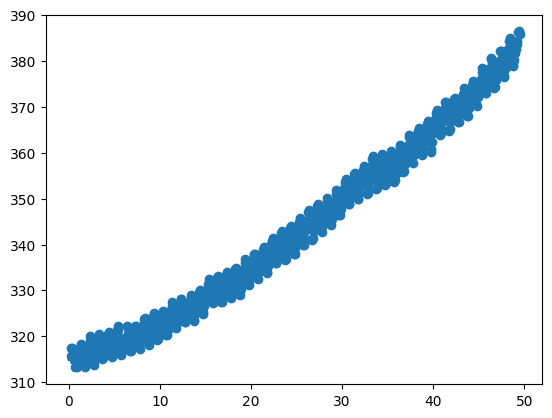

            3           2
-0.0001183 x + 0.02096 x + 0.6249 x + 314.9


In [43]:
# degree 3 polynomial fit or cubic fit
model = np.poly1d(np.polyfit(X_train.flatten(), # Use the X_train NumPy array and flatten it
                             y_train, 3))

# polynomial line visualization
polyline = np.linspace(0, 10, 100)
plt.scatter(X_train, y_train)
plt.plot(polyline, model(polyline))
plt.show()

print(model)

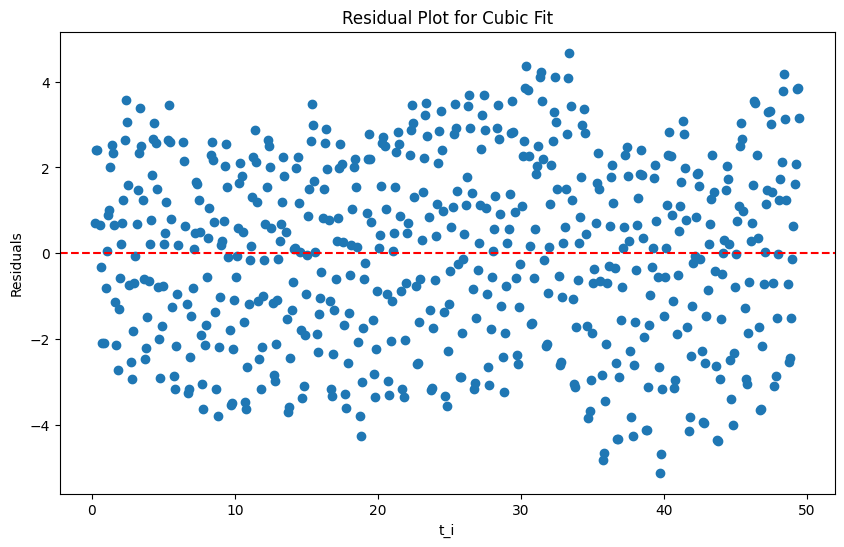

In [44]:
# prompt: residual plot for the cubic

import matplotlib.pyplot as plt
# Calculate residuals for the cubic model
residuals_cubic = y_train - model(X_train.flatten())

# Plot residuals for the cubic model
plt.figure(figsize=(10, 6))
plt.scatter(X_train, residuals_cubic)
plt.xlabel('t_i')
plt.ylabel('Residuals')
plt.title('Residual Plot for Cubic Fit')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()


In [45]:
# prompt: find the RSPE and the MAPE for the cubic

import numpy as np
# Predictions on the test set using the cubic model
y_pred_cubic = model(X_test.flatten())

# Calculating RMSE, RSPE and MAPE for the cubic model
rmse_cubic = np.sqrt(mean_squared_error(y_test, y_pred_cubic))
rspe_cubic = np.sqrt(np.sum((y_test - y_pred_cubic)**2) / np.sum((y_test - np.mean(y_test))**2))
mape_cubic = mean_absolute_percentage_error(y_test, y_pred_cubic)

print(f'RMSE (Cubic Model): {rmse_cubic:.2f}')
print(f'RSPE (Cubic Model): {rspe_cubic:.2%}')
print(f'MAPE (Cubic Model): {mape_cubic:.2%}')


RMSE (Cubic Model): 4.15
RSPE (Cubic Model): 47.62%
MAPE (Cubic Model): 0.85%
